## Observations and Insights 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_metadata.head()

new_dataset = pd.merge(study_results, mouse_metadata, on="Mouse ID")

new_dataset.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [52]:
# Checking the number of mice in the DataFrame.
unique_mice = len(new_dataset["Mouse ID"].unique())

unique_mice


249

In [53]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupmouse = new_dataset.loc[new_dataset[["Mouse ID", "Timepoint"]].duplicated(), "Mouse ID"].unique()

dupmouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = new_dataset.drop(new_dataset.index[new_dataset["Mouse ID"] =="g989"])

clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [55]:
# Checking the number of mice in the clean DataFrame.
unique_mice = len(new_dataset["Mouse ID"].unique())

print(unique_mice)

249


In [61]:
#Create an index for Drug Regimen:

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
drug_regimen_df=clean_df.groupby(["Drug Regimen"])

tumor_mean=drug_regimen_df["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_response_df=pd.DataFrame(tumor_mean)

# Preview DataFrame
tumor_response_summary_df=tumor_response_df.copy()
tumor_response_summary_df.reset_index()



,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.320930
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Store the Mean Tumor Volume Data Grouped by Drug
drug_reg=clean_df.groupby(["Drug Regimen"])

tumor_mean=drug_reg["Tumor Volume (mm3)"].mean()
tumor_median=drug_reg["Tumor Volume (mm3)"].median()
tumor_var=drug_reg["Tumor Volume (mm3)"].var()
tumor_std=drug_reg["Tumor Volume (mm3)"].std()
tumor_sem=drug_reg["Tumor Volume (mm3)"].sem()



tumor_summary = pd.DataFrame({"Tumor mean": tumor_mean, "Tumor median": tumor_median,
                                "Tumor variance": tumor_var, "Tumor std dev": tumor_std,
                             "Tumor SEM": tumor_sem })


tumor_summary


tumor_summary["Tumor mean"] = tumor_summary["Tumor mean"].map("{:.2f}".format)
tumor_summary["Tumor median"] = tumor_summary["Tumor median"].map("{:.2f}".format)
tumor_summary["Tumor variance"] = tumor_summary["Tumor variance"].map("{:.2f}".format)
tumor_summary["Tumor std dev"] = tumor_summary["Tumor std dev"].map("{:.2f}".format)
tumor_summary["Tumor SEM"] = tumor_summary["Tumor SEM"].map("{:.2f}".format)


tumor_summary = tumor_summary[tumor_summary["Tumor mean"]!="?"]

tumor_summary

tumor_summary["Tumor mean"] = pd.to_numeric(tumor_summary["Tumor mean"])
tumor_summary["Tumor median"] = pd.to_numeric(tumor_summary["Tumor median"])
tumor_summary["Tumor variance"] = pd.to_numeric(tumor_summary["Tumor variance"])
tumor_summary["Tumor std dev"] = pd.to_numeric(tumor_summary["Tumor std dev"])
tumor_summary["Tumor SEM"] = pd.to_numeric(tumor_summary["Tumor SEM"])

tumor_summary



,Tumor mean,Tumor median,Tumor variance,Tumor std dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


<AxesSubplot:xlabel='Drug Regimen'>

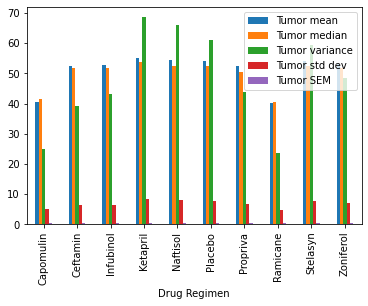

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

stat_summary = tumor_summary.plot(kind="bar")

stat_summary


## Bar Plots

In [111]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

timepoint_df=clean_df.groupby(["Timepoint"])

mice_per_time_df= timepoint_df["Timepoint"].sum()

time_summary



,Timepoint
Timepoint,
0,0
5,1180
10,2210
15,3075
20,3860
25,4550
30,5100
35,5355
40,5680


In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

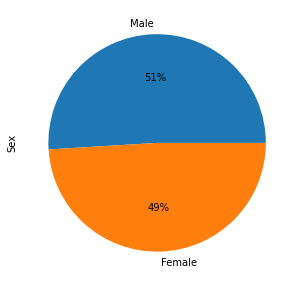

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
by_sex = clean_df["Sex"].value_counts()
plot = by_sex.plot.pie(y='mass', figsize=(5, 5), subplots=True, autopct='%.f%%')


Text(0.5, 1.0, 'By sex')

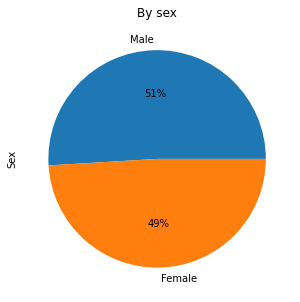

In [158]:
by_sex = clean_df["Sex"].value_counts()

by_sex.plot(kind="pie", autopct='%1.f%%', figsize=(5, 5))
plt.title(f"By sex")


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
